# Budget Analysis

Explore categorised transaction data from `data/budget.db`.

In [4]:
import sqlite3
import polars as pl
import matplotlib.pyplot as plt

conn = sqlite3.connect("data/budget.db")
df = pl.read_database("""
    SELECT date, raw_description, amount, currency, merchant_name,
           category, source, confidence, import_batch
    FROM transactions
    ORDER BY date DESC
""", conn)

df = df.with_columns(
    pl.col("date").str.strptime(pl.Date, "%Y-%m-%d")
).with_columns(
    pl.col("date").dt.strftime("%Y-%m").alias("month")
)
print(f"{len(df)} transactions loaded")
df.head(10)

7317 transactions loaded


date,raw_description,amount,currency,merchant_name,category,source,confidence,import_batch,month
date,str,f64,str,str,str,str,f64,str,str
2026-02-16,"""PARKINGPAY APP; Payment UBS TW…",-2.95,"""CHF""","""PARKINGPAY""","""Transport""","""cache""",0.95,"""jude-2026.csv""","""2026-02"""
2026-02-15,"""APPLE.COM/BILL 0800001853 IRL""",0.0,"""CHF""","""APPLE.COM/BILL 0800001853 IRL""","""Subscriptions""","""manual""",1.0,"""credit-card.csv""","""2026-02"""
2026-02-15,"""RESTAURANT STARTGELS FLIMS DOR…",0.0,"""CHF""","""RESTAURANT STARTGELS FLIMS DOR…","""Dining""","""manual""",1.0,"""credit-card.csv""","""2026-02"""
2026-02-15,"""CREST - Feinbaeckerei Flims do…",0.0,"""CHF""","""Feinbäckerei""","""Groceries""","""cache""",0.95,"""credit-card.csv""","""2026-02"""
2026-02-15,"""IKEA AG; Payment UBS TWINT""",-108.85,"""CHF""","""IKEA AG""","""Shopping""","""cache""",0.95,"""jude-2026.csv""","""2026-02"""
2026-02-15,""", LILY; Debit UBS TWINT""",-28.0,"""CHF""","""LILY""","""Children""","""manual""",1.0,"""jude-2026.csv""","""2026-02"""
2026-02-14,"""CAPOL'S FLIMS DORF GR CHE""",0.0,"""CHF""","""CAPOL'S FLIMS DORF""","""Dining""","""llm""",0.95,"""credit-card.csv""","""2026-02"""
2026-02-14,"""SBB CFF FFS MOBILE TICKET BERN…",0.0,"""CHF""","""SBB""","""Transport""","""llm""",0.95,"""credit-card.csv""","""2026-02"""
2026-02-14,"""VIA D.O.L. GmbH Chur CHE""",0.0,"""CHF""","""VIA D.O.L. GmbH""","""Transport""","""cache""",0.95,"""credit-card.csv""","""2026-02"""


## Spending by Category

In [5]:
# Exclude Transfers to avoid double-counting credit card payments
spending = df.filter(
    (pl.col("amount") < 0) & (pl.col("category") != "Transfers")
).with_columns(
    pl.col("amount").abs()
)

by_cat = (
    spending
    .group_by("category")
    .agg(pl.col("amount").sum())
    .sort("amount", descending=True)
)
print(by_cat)
print(f"\nTotal spending: CHF {by_cat['amount'].sum():,.2f}")

shape: (17, 2)
┌───────────────┬───────────┐
│ category      ┆ amount    │
│ ---           ┆ ---       │
│ str           ┆ f64       │
╞═══════════════╪═══════════╡
│ Taxes         ┆ 329699.45 │
│ Investments   ┆ 213779.17 │
│ Housing       ┆ 115931.02 │
│ Other         ┆ 109600.79 │
│ Shopping      ┆ 102434.98 │
│ …             ┆ …         │
│ Transport     ┆ 31675.52  │
│ Fees          ┆ 21591.64  │
│ Subscriptions ┆ 15980.27  │
│ Cash          ┆ 2842.4    │
│ Uncategorised ┆ 83.99     │
└───────────────┴───────────┘

Total spending: CHF 1,358,949.60


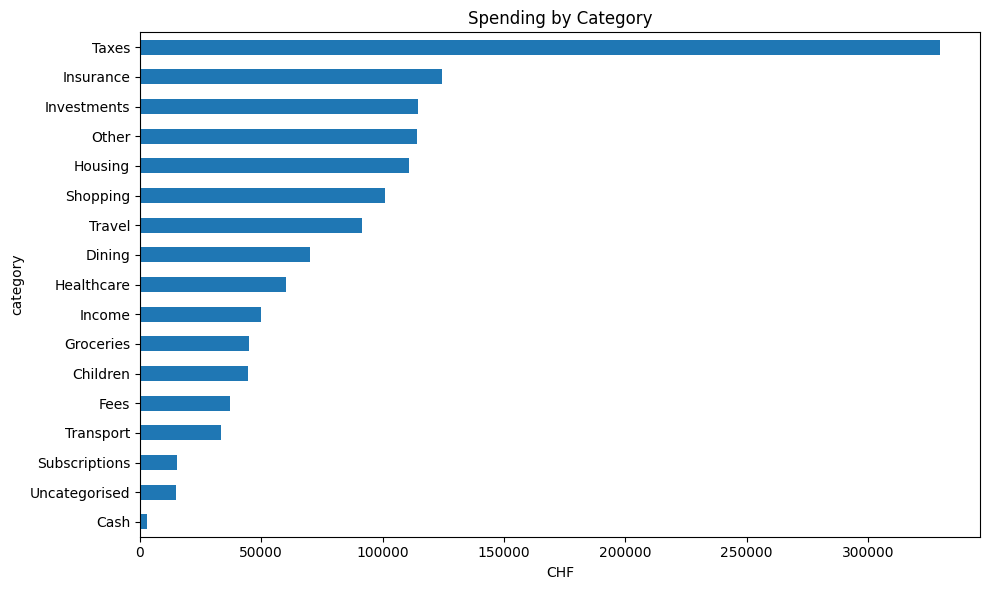

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
by_cat_pd = by_cat.to_pandas().set_index("category")
by_cat_pd.plot.barh(ax=ax, legend=False)
ax.set_xlabel("CHF")
ax.set_title("Spending by Category")
ax.invert_yaxis()
plt.tight_layout()
plt.show()

## Deep Dive: "Other" Category

The "Other" category is the 3rd largest spend. Let's break it down to see what's hiding in there.

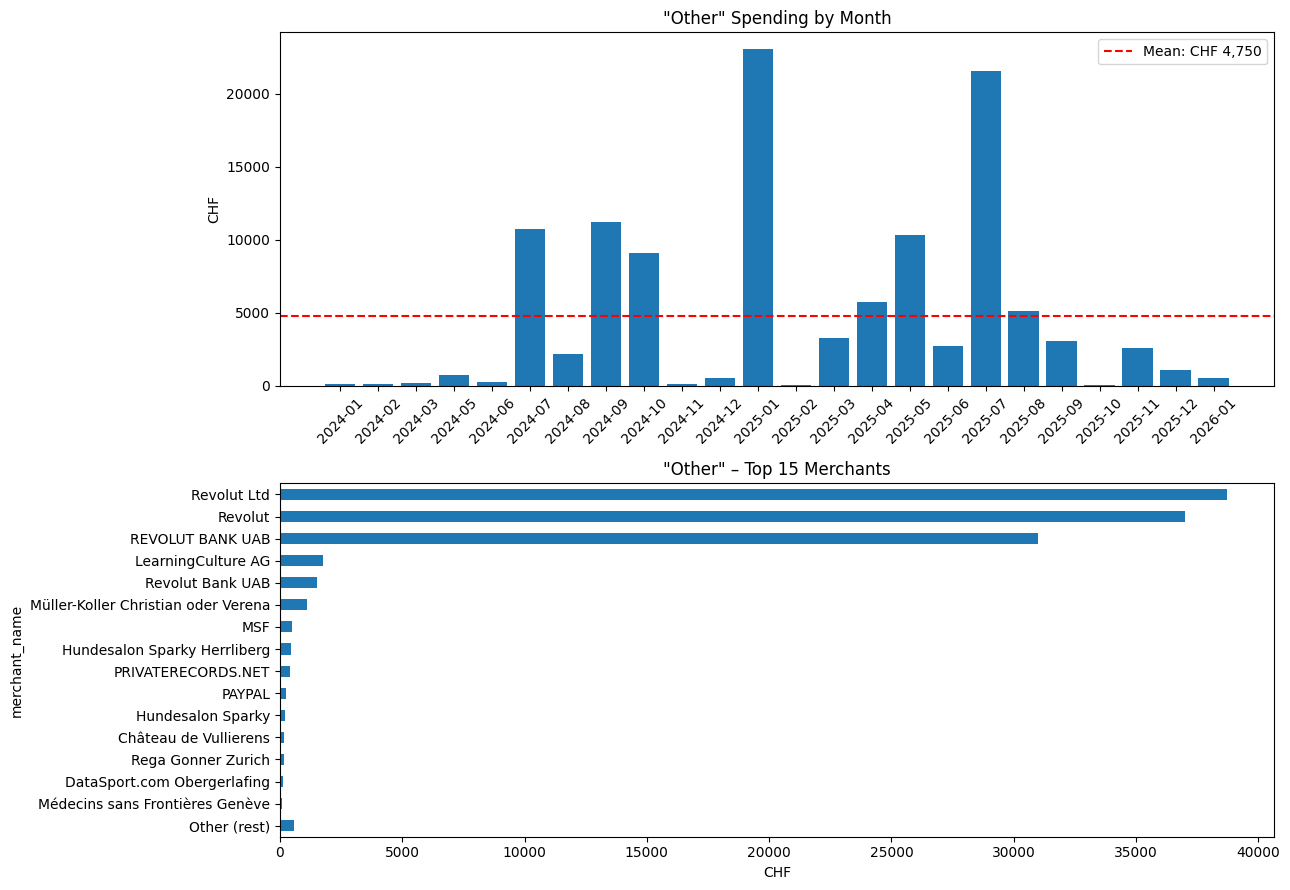

Total 'Other' spend: CHF 113,994.15 across 77 transactions
Unique merchants: 30

Top 20 merchants:
shape: (20, 4)
┌─────────────────────┬───────────┬──────────────┬─────────────┐
│ merchant_name       ┆ total_chf ┆ transactions ┆ avg_per_txn │
│ ---                 ┆ ---       ┆ ---          ┆ ---         │
│ str                 ┆ f64       ┆ u32          ┆ f64         │
╞═════════════════════╪═══════════╪══════════════╪═════════════╡
│ Revolut Ltd         ┆ 38700.0   ┆ 8            ┆ 4837.5      │
│ Revolut             ┆ 37000.0   ┆ 13           ┆ 2846.153846 │
│ REVOLUT BANK UAB    ┆ 31000.0   ┆ 8            ┆ 3875.0      │
│ LearningCulture AG  ┆ 1770.0    ┆ 1            ┆ 1770.0      │
│ Revolut Bank UAB    ┆ 1500.0    ┆ 2            ┆ 750.0       │
│ …                   ┆ …         ┆ …            ┆ …           │
│ Tischlein deck dich ┆ 100.0     ┆ 1            ┆ 100.0       │
│ TrackMaxx           ┆ 96.0      ┆ 2            ┆ 48.0        │
│ PayPal              ┆ 70.04     ┆ 1    

In [3]:
other = spending.filter(pl.col("category") == "Other")

# Top merchants in "Other"
other_merchants = (
    other
    .group_by("merchant_name")
    .agg([
        pl.col("amount").sum().alias("total_chf"),
        pl.col("amount").count().alias("transactions"),
        pl.col("amount").mean().alias("avg_per_txn"),
    ])
    .sort("total_chf", descending=True)
)

# Monthly trend
other_monthly = (
    other
    .group_by("month")
    .agg(pl.col("amount").sum().alias("total_chf"))
    .sort("month")
)

fig, axes = plt.subplots(2, 1, figsize=(13, 9))

# Monthly spend
om_pd = other_monthly.to_pandas().set_index("month")
axes[0].bar(om_pd.index, om_pd["total_chf"])
mean_monthly = om_pd["total_chf"].mean()
axes[0].axhline(y=mean_monthly, color="red", linestyle="--", label=f"Mean: CHF {mean_monthly:,.0f}")
axes[0].set_ylabel("CHF")
axes[0].set_title('"Other" Spending by Month')
axes[0].tick_params(axis="x", rotation=45)
axes[0].legend()

# Top merchants bar
top_n = 15
top_other = other_merchants.head(top_n)
remaining = other_merchants.slice(top_n)["total_chf"].sum()
import pandas as pd
bar_data = top_other.select(["merchant_name", "total_chf"]).to_pandas()
if remaining > 0:
    bar_data = pd.concat([bar_data, pd.DataFrame({"merchant_name": ["Other (rest)"], "total_chf": [remaining]})], ignore_index=True)
bar_data = bar_data.set_index("merchant_name")
bar_data["total_chf"].plot.barh(ax=axes[1])
axes[1].set_xlabel("CHF")
axes[1].set_title(f'"Other" – Top {top_n} Merchants')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

print(f"Total 'Other' spend: CHF {other['amount'].sum():,.2f} across {other.height} transactions")
print(f"Unique merchants: {other_merchants.height}")
print(f"\nTop 20 merchants:")
print(other_merchants.head(20))

# Classification source breakdown — how many were LLM vs manual?
print(f"\nClassification source for 'Other' transactions:")
print(other.group_by("source").agg([pl.len().alias("count"), pl.col("confidence").mean().alias("avg_confidence")]).sort("count", descending=True))

## Deep Dive: Shopping

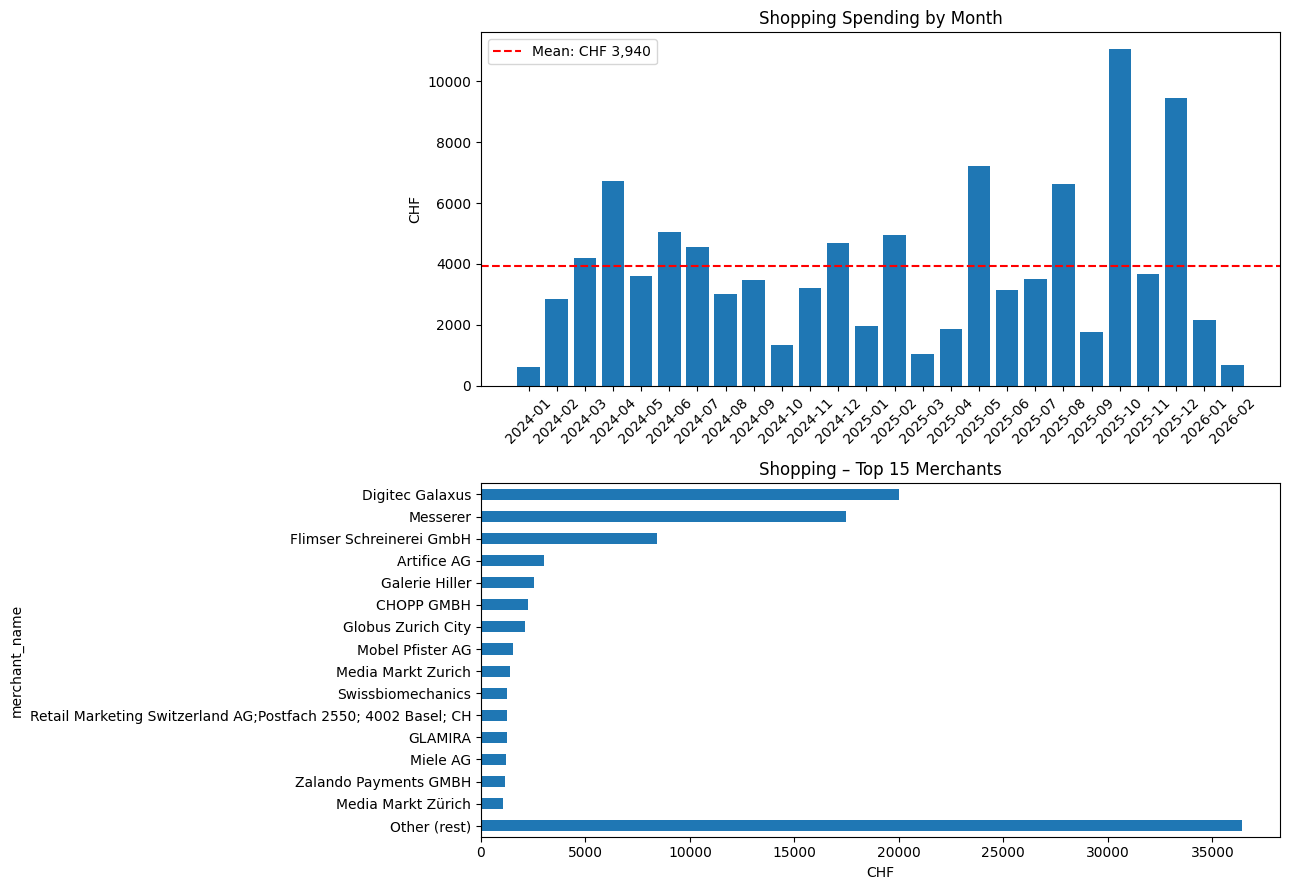

Total Shopping spend: CHF 102,434.98 across 611 transactions
Unique merchants: 284

Top 20 merchants:
shape: (20, 4)
┌──────────────────────────┬───────────┬──────────────┬─────────────┐
│ merchant_name            ┆ total_chf ┆ transactions ┆ avg_per_txn │
│ ---                      ┆ ---       ┆ ---          ┆ ---         │
│ str                      ┆ f64       ┆ u32          ┆ f64         │
╞══════════════════════════╪═══════════╪══════════════╪═════════════╡
│ Digitec Galaxus          ┆ 20022.69  ┆ 79           ┆ 253.451772  │
│ Messerer                 ┆ 17460.0   ┆ 5            ┆ 3492.0      │
│ Flimser Schreinerei GmbH ┆ 8442.6    ┆ 2            ┆ 4221.3      │
│ Artifice AG              ┆ 3026.8    ┆ 1            ┆ 3026.8      │
│ Galerie Hiller           ┆ 2550.0    ┆ 1            ┆ 2550.0      │
│ …                        ┆ …         ┆ …            ┆ …           │
│ Manor AG                 ┆ 1053.0    ┆ 10           ┆ 105.3       │
│ Globus Otelfingen CHE    ┆ 1008.2    ┆ 2 

In [11]:
shopping = (
    spending
    .filter(pl.col("category") == "Shopping")
    .with_columns(
        pl.when(pl.col("merchant_name").str.to_lowercase().str.contains("digitec|galaxus|digitc|galaxu"))
        .then(pl.lit("Digitec Galaxus"))
        .when(pl.col("merchant_name").str.to_lowercase().str.contains("messerer"))
        .then(pl.lit("Messerer"))
        .otherwise(pl.col("merchant_name"))
        .alias("merchant_name")
    )
)

# Top merchants
shopping_merchants = (
    shopping
    .group_by("merchant_name")
    .agg([
        pl.col("amount").sum().alias("total_chf"),
        pl.col("amount").count().alias("transactions"),
        pl.col("amount").mean().alias("avg_per_txn"),
    ])
    .sort("total_chf", descending=True)
)

# Monthly trend
shopping_monthly = (
    shopping
    .group_by("month")
    .agg(pl.col("amount").sum().alias("total_chf"))
    .sort("month")
)

fig, axes = plt.subplots(2, 1, figsize=(13, 9))

# Monthly spend
sm_pd = shopping_monthly.to_pandas().set_index("month")
axes[0].bar(sm_pd.index, sm_pd["total_chf"])
mean_monthly = sm_pd["total_chf"].mean()
axes[0].axhline(y=mean_monthly, color="red", linestyle="--", label=f"Mean: CHF {mean_monthly:,.0f}")
axes[0].set_ylabel("CHF")
axes[0].set_title("Shopping Spending by Month")
axes[0].tick_params(axis="x", rotation=45)
axes[0].legend()

# Top merchants bar
top_n = 15
top_shopping = shopping_merchants.head(top_n)
remaining = shopping_merchants.slice(top_n)["total_chf"].sum()
import pandas as pd
bar_data = top_shopping.select(["merchant_name", "total_chf"]).to_pandas()
if remaining > 0:
    bar_data = pd.concat([bar_data, pd.DataFrame({"merchant_name": ["Other (rest)"], "total_chf": [remaining]})], ignore_index=True)
bar_data = bar_data.set_index("merchant_name")
bar_data["total_chf"].plot.barh(ax=axes[1])
axes[1].set_xlabel("CHF")
axes[1].set_title(f"Shopping – Top {top_n} Merchants")
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

print(f"Total Shopping spend: CHF {shopping['amount'].sum():,.2f} across {shopping.height} transactions")
print(f"Unique merchants: {shopping_merchants.height}")
print(f"\nTop 20 merchants:")
print(shopping_merchants.head(20))

print(f"\nClassification source for Shopping transactions:")
print(shopping.group_by("source").agg([pl.len().alias("count"), pl.col("confidence").mean().alias("avg_confidence")]).sort("count", descending=True))

## Monthly Spending Trend

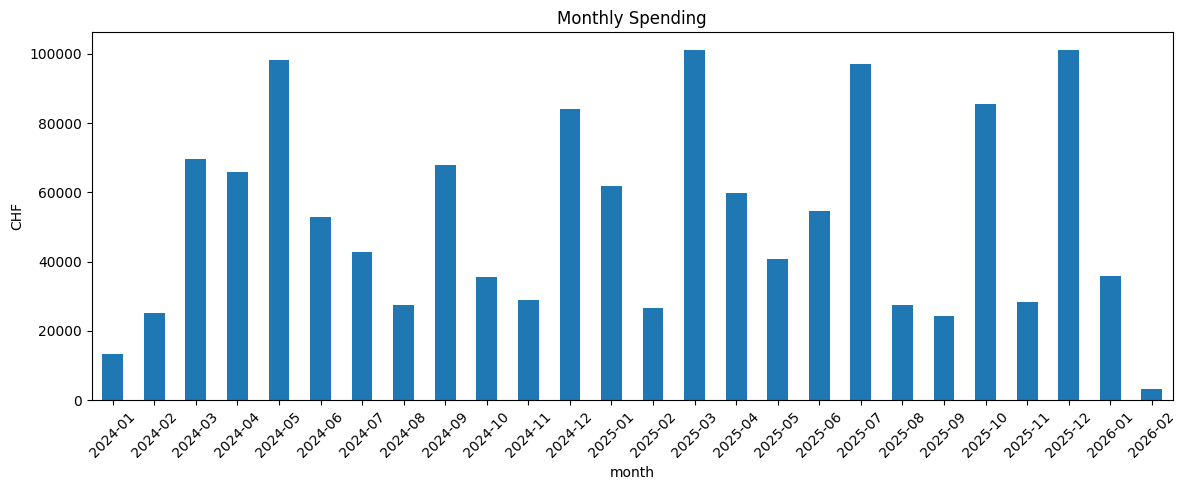

In [7]:
monthly = (
    spending
    .group_by("month")
    .agg(pl.col("amount").sum())
    .sort("month")
)

fig, ax = plt.subplots(figsize=(12, 5))
monthly_pd = monthly.to_pandas().set_index("month")
monthly_pd.plot.bar(ax=ax, legend=False)
ax.set_ylabel("CHF")
ax.set_title("Monthly Spending")
ax.tick_params(axis="x", rotation=45)
plt.tight_layout()
plt.show()

## Top Merchants

In [8]:
top = (
    spending
    .group_by("merchant_name")
    .agg([
        pl.col("amount").sum().alias("total_chf"),
        pl.col("amount").count().alias("transactions")
    ])
    .sort("total_chf", descending=True)
    .head(20)
)
top

merchant_name,total_chf,transactions
str,f64,u32
"""Gemeinde Küssnacht""",148610.85,13
"""Baloise Life Ltd""",80000.0,5
"""Kanton Zürich;Steuerbezug; 809…",78275.05,4
"""Gemeinde Küsnacht""",56230.0,2
"""Kanton Zürich""",42629.0,1
…,…,…
"""UBS (CH) Investment Fund - Equ…",19999.83,1
"""Maria Inmaculada Rodriguez Cal…",19980.0,111
"""FX CR-3S6JL""",18713.2,1


## Monthly Spending by Category

/var/folders/ph/4rr285cs4fd6gx9flnxn5zd00000gn/T/ipykernel_3140/1727735617.py:6: DeprecationWarning: the argument `columns` for `DataFrame.pivot` is deprecated. It was renamed to `on` in version 1.0.0.
  .pivot(values="amount", index="month", columns="category")


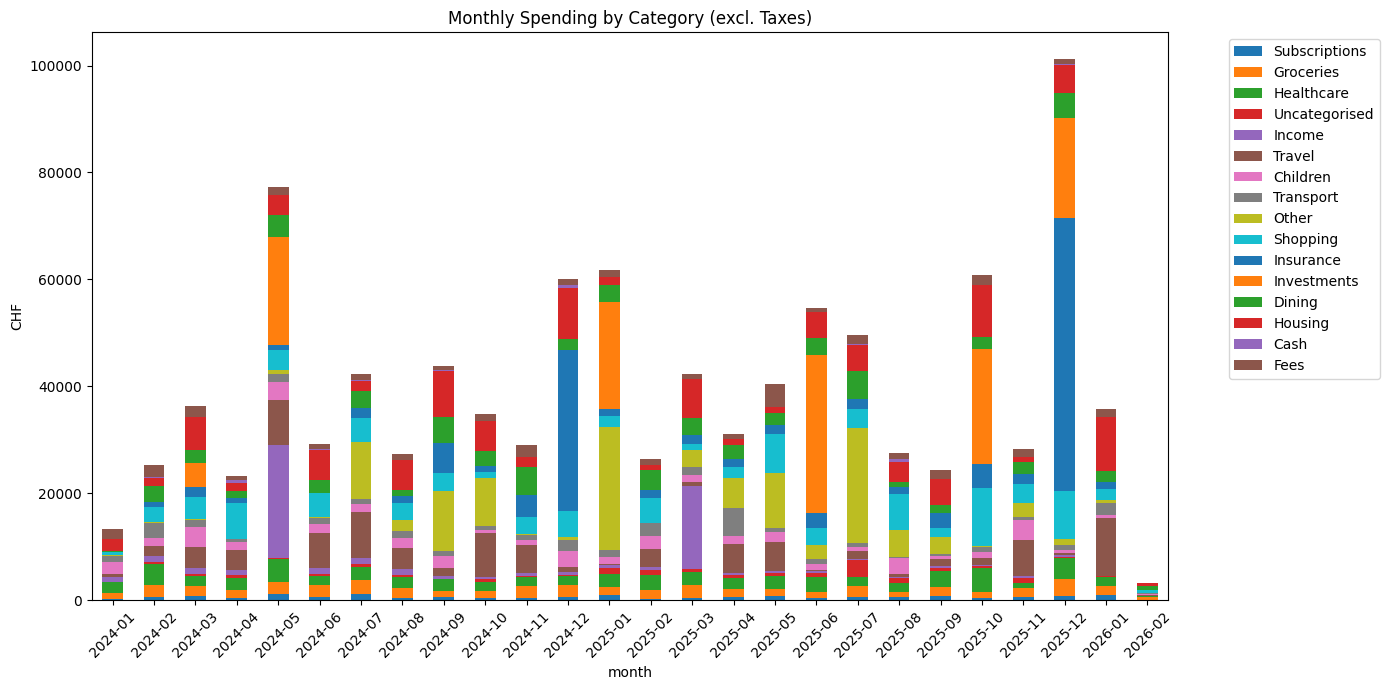

In [18]:
pivot = (
    spending
    .filter(pl.col("category") != "Taxes")
    .group_by(["month", "category"])
    .agg(pl.col("amount").sum())
    .pivot(values="amount", index="month", columns="category")
    .fill_null(0)
    .sort("month")
)

fig, ax = plt.subplots(figsize=(14, 7))
pivot_pd = pivot.to_pandas().set_index("month")
pivot_pd.plot.bar(stacked=True, ax=ax)
ax.set_ylabel("CHF")
ax.set_title("Monthly Spending by Category (excl. Taxes)")
ax.tick_params(axis="x", rotation=45)
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

## Classification Quality

In [22]:
print("Source distribution:")
source_counts = df.group_by("source").agg(pl.len().alias("count")).sort("count", descending=True)
print(source_counts)

mean_conf = df["confidence"].mean()
low_conf_count = df.filter(pl.col("confidence") < 0.8).height
uncat_count = df.filter(pl.col("category") == "Uncategorised").height

print(f"\nMean confidence: {mean_conf:.2%}")
print(f"Low confidence (<0.8): {low_conf_count} transactions")
print(f"Uncategorised: {uncat_count} transactions")

Source distribution:
shape: (3, 2)
┌────────┬───────┐
│ source ┆ count │
│ ---    ┆ ---   │
│ str    ┆ u32   │
╞════════╪═══════╡
│ cache  ┆ 4768  │
│ llm    ┆ 1586  │
│ manual ┆ 963   │
└────────┴───────┘

Mean confidence: 90.73%
Low confidence (<0.8): 359 transactions
Uncategorised: 337 transactions


## Income vs Spending

/var/folders/ph/4rr285cs4fd6gx9flnxn5zd00000gn/T/ipykernel_2575/2890288206.py:18: DeprecationWarning: use of `how='outer'` should be replaced with `how='full'`.
(Deprecated in version 0.20.29)
  .join(expenses, on="month", how="outer", suffix="_expense")


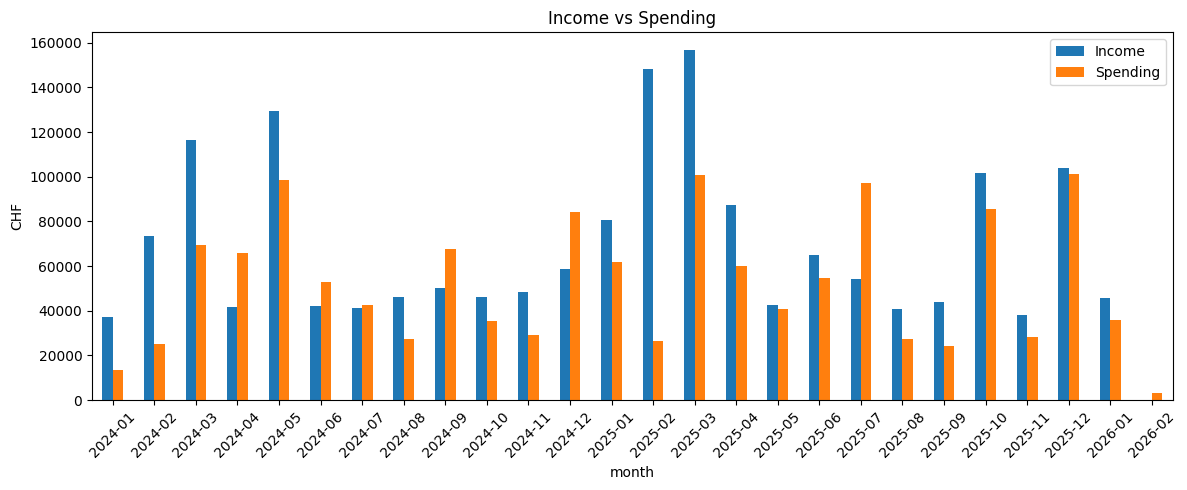

shape: (26, 5)
┌─────────┬───────────┬───────────────┬───────────┬───────────┐
│ month   ┆ Income    ┆ month_expense ┆ Spending  ┆ Net       │
│ ---     ┆ ---       ┆ ---           ┆ ---       ┆ ---       │
│ str     ┆ f64       ┆ str           ┆ f64       ┆ f64       │
╞═════════╪═══════════╪═══════════════╪═══════════╪═══════════╡
│ 2024-01 ┆ 37266.87  ┆ 2024-01       ┆ 13353.24  ┆ 23913.63  │
│ 2024-02 ┆ 73535.45  ┆ 2024-02       ┆ 25249.9   ┆ 48285.55  │
│ 2024-03 ┆ 116355.89 ┆ 2024-03       ┆ 69487.46  ┆ 46868.43  │
│ 2024-04 ┆ 41575.67  ┆ 2024-04       ┆ 65888.63  ┆ -24312.96 │
│ 2024-05 ┆ 129464.3  ┆ 2024-05       ┆ 98344.21  ┆ 31120.09  │
│ …       ┆ …         ┆ …             ┆ …         ┆ …         │
│ 2025-10 ┆ 101451.99 ┆ 2025-10       ┆ 85491.2   ┆ 15960.79  │
│ 2025-11 ┆ 38087.5   ┆ 2025-11       ┆ 28190.0   ┆ 9897.5    │
│ 2025-12 ┆ 103762.6  ┆ 2025-12       ┆ 101153.23 ┆ 2609.37   │
│ 2026-01 ┆ 45654.03  ┆ 2026-01       ┆ 35725.59  ┆ 9928.44   │
│ 2026-02 ┆ 33.0      ┆ 2

In [23]:
income = (
    df.filter(pl.col("amount") > 0)
    .group_by("month")
    .agg(pl.col("amount").sum())
    .sort("month")
)

# Exclude Transfers to avoid double-counting credit card payments
expenses = (
    df.filter((pl.col("amount") < 0) & (pl.col("category") != "Transfers"))
    .group_by("month")
    .agg(pl.col("amount").sum().abs())
    .sort("month")
)

summary = (
    income
    .join(expenses, on="month", how="outer", suffix="_expense")
    .fill_null(0)
    .rename({"amount": "Income", "amount_expense": "Spending"})
    .with_columns(
        (pl.col("Income") - pl.col("Spending")).alias("Net")
    )
    .sort("month")
)

fig, ax = plt.subplots(figsize=(12, 5))
summary_pd = summary.select(["month", "Income", "Spending"]).to_pandas().set_index("month")
summary_pd.plot.bar(ax=ax)
ax.axhline(y=0, color="black", linewidth=0.5)
ax.set_ylabel("CHF")
ax.set_title("Income vs Spending")
ax.tick_params(axis="x", rotation=45)
plt.tight_layout()
plt.show()

print(summary)

## Groceries by Month

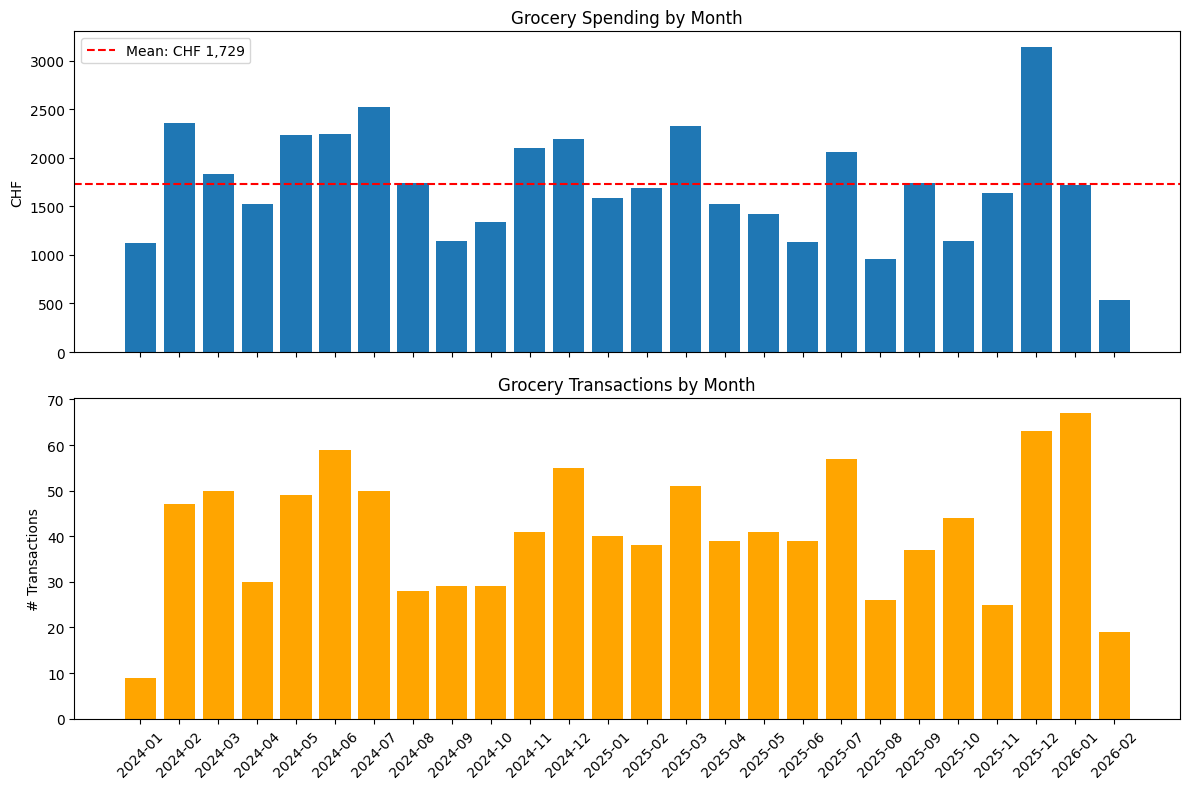

shape: (26, 4)
┌─────────┬───────────┬──────────────┬─────────────────────┐
│ month   ┆ total_chf ┆ transactions ┆ avg_per_transaction │
│ ---     ┆ ---       ┆ ---          ┆ ---                 │
│ str     ┆ f64       ┆ u32          ┆ f64                 │
╞═════════╪═══════════╪══════════════╪═════════════════════╡
│ 2024-01 ┆ 1119.15   ┆ 9            ┆ 124.35              │
│ 2024-02 ┆ 2353.25   ┆ 47           ┆ 50.069149           │
│ 2024-03 ┆ 1834.56   ┆ 50           ┆ 36.6912             │
│ 2024-04 ┆ 1528.87   ┆ 30           ┆ 50.962333           │
│ 2024-05 ┆ 2238.34   ┆ 49           ┆ 45.680408           │
│ …       ┆ …         ┆ …            ┆ …                   │
│ 2025-10 ┆ 1146.8    ┆ 44           ┆ 26.063636           │
│ 2025-11 ┆ 1636.3    ┆ 25           ┆ 65.452              │
│ 2025-12 ┆ 3143.92   ┆ 63           ┆ 49.903492           │
│ 2026-01 ┆ 1715.05   ┆ 67           ┆ 25.597761           │
│ 2026-02 ┆ 537.9     ┆ 19           ┆ 28.310526           │
└────────

In [19]:
groceries = (
    spending
    .filter(pl.col("category") == "Groceries")
    .group_by("month")
    .agg([
        pl.col("amount").sum().alias("total_chf"),
        pl.col("amount").count().alias("transactions"),
        pl.col("amount").mean().alias("avg_per_transaction"),
    ])
    .sort("month")
)

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

groceries_pd = groceries.to_pandas().set_index("month")

# Total spend per month
axes[0].bar(groceries_pd.index, groceries_pd["total_chf"])
axes[0].set_ylabel("CHF")
axes[0].set_title("Grocery Spending by Month")
mean_monthly = groceries_pd["total_chf"].mean()
axes[0].axhline(y=mean_monthly, color="red", linestyle="--", label=f"Mean: CHF {mean_monthly:,.0f}")
axes[0].legend()

# Transaction count per month
axes[1].bar(groceries_pd.index, groceries_pd["transactions"], color="orange")
axes[1].set_ylabel("# Transactions")
axes[1].set_title("Grocery Transactions by Month")
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

print(groceries)
print(f"\nMonthly average: CHF {mean_monthly:,.2f}")
print(f"Avg per transaction: CHF {groceries['avg_per_transaction'].mean():,.2f}")

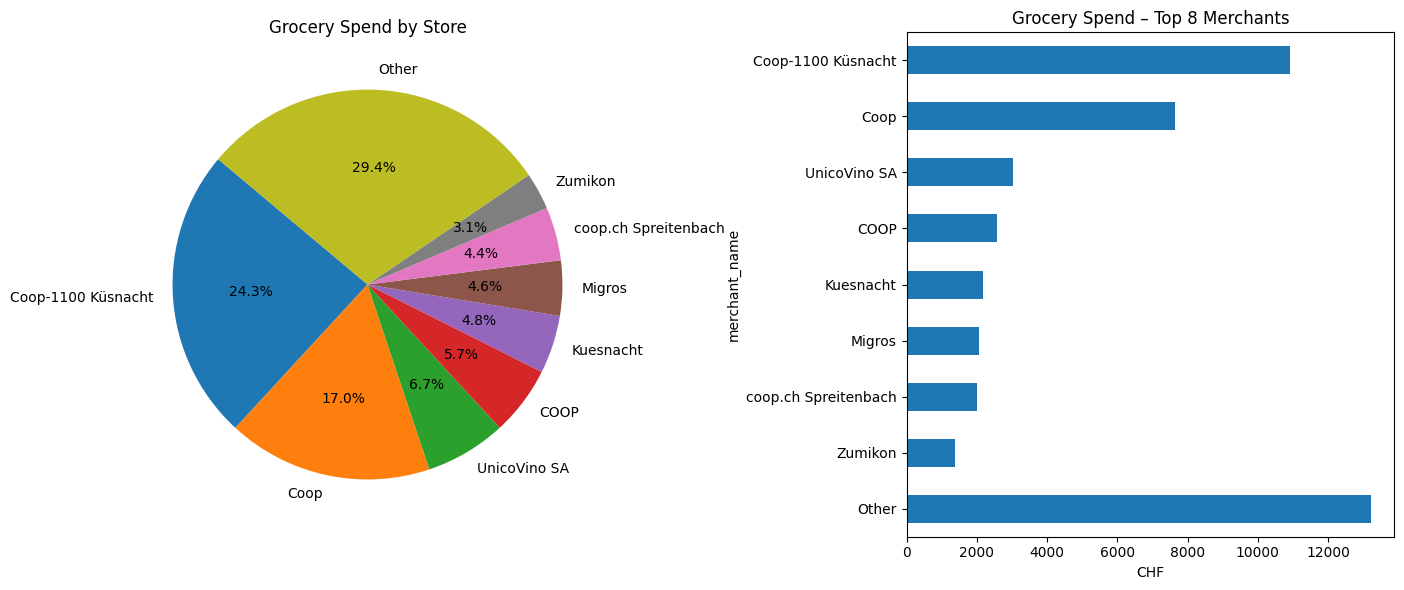

shape: (167, 3)
┌──────────────────────────────┬───────────┬──────────────┐
│ merchant_name                ┆ total_chf ┆ transactions │
│ ---                          ┆ ---       ┆ ---          │
│ str                          ┆ f64       ┆ u32          │
╞══════════════════════════════╪═══════════╪══════════════╡
│ Coop-1100 Küsnacht           ┆ 10906.8   ┆ 166          │
│ Coop                         ┆ 7641.6    ┆ 193          │
│ UnicoVino SA                 ┆ 3023.55   ┆ 15           │
│ COOP                         ┆ 2580.15   ┆ 14           │
│ Kuesnacht                    ┆ 2164.2    ┆ 59           │
│ …                            ┆ …         ┆ …            │
│ Ladenzentrum Zürich          ┆ 2.75      ┆ 1            │
│ Kisoque de Lully             ┆ 2.3       ┆ 1            │
│ AutopStuetzliwoeschAGZuerich ┆ 2.0       ┆ 1            │
│ Coop Zürich                  ┆ 1.95      ┆ 1            │
│ Migrolino Langstrasse Zurich ┆ 1.95      ┆ 1            │
└───────────────────────

In [22]:
grocery_spending = (
    spending
    .filter(pl.col("category") == "Groceries")
    .with_columns(
        pl.when(pl.col("merchant_name").str.to_lowercase().str.contains("migros"))
        .then(pl.lit("Migros"))
        .otherwise(pl.col("merchant_name"))
        .alias("merchant_name")
    )
)

grocery_merchants = (
    grocery_spending
    .group_by("merchant_name")
    .agg([
        pl.col("amount").sum().alias("total_chf"),
        pl.col("amount").count().alias("transactions"),
    ])
    .sort("total_chf", descending=True)
)

# Pie chart of top merchants (group small ones as "Other")
top_n = 8
top_merchants = grocery_merchants.head(top_n)
other_total = grocery_merchants.slice(top_n)["total_chf"].sum()

labels = top_merchants["merchant_name"].to_list() + ["Other"]
values = top_merchants["total_chf"].to_list() + [other_total]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart
axes[0].pie(values, labels=labels, autopct="%1.1f%%", startangle=140)
axes[0].set_title("Grocery Spend by Store")

# Horizontal bar of top merchants + Other
import pandas as pd
bar_data = top_merchants.select(["merchant_name", "total_chf"]).to_pandas()
if other_total > 0:
    bar_data = pd.concat([bar_data, pd.DataFrame({"merchant_name": ["Other"], "total_chf": [other_total]})], ignore_index=True)
bar_data = bar_data.set_index("merchant_name")
bar_data["total_chf"].plot.barh(ax=axes[1])
axes[1].set_xlabel("CHF")
axes[1].set_title(f"Grocery Spend – Top {top_n} Merchants")
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

print(grocery_merchants)

## Dining & Bars

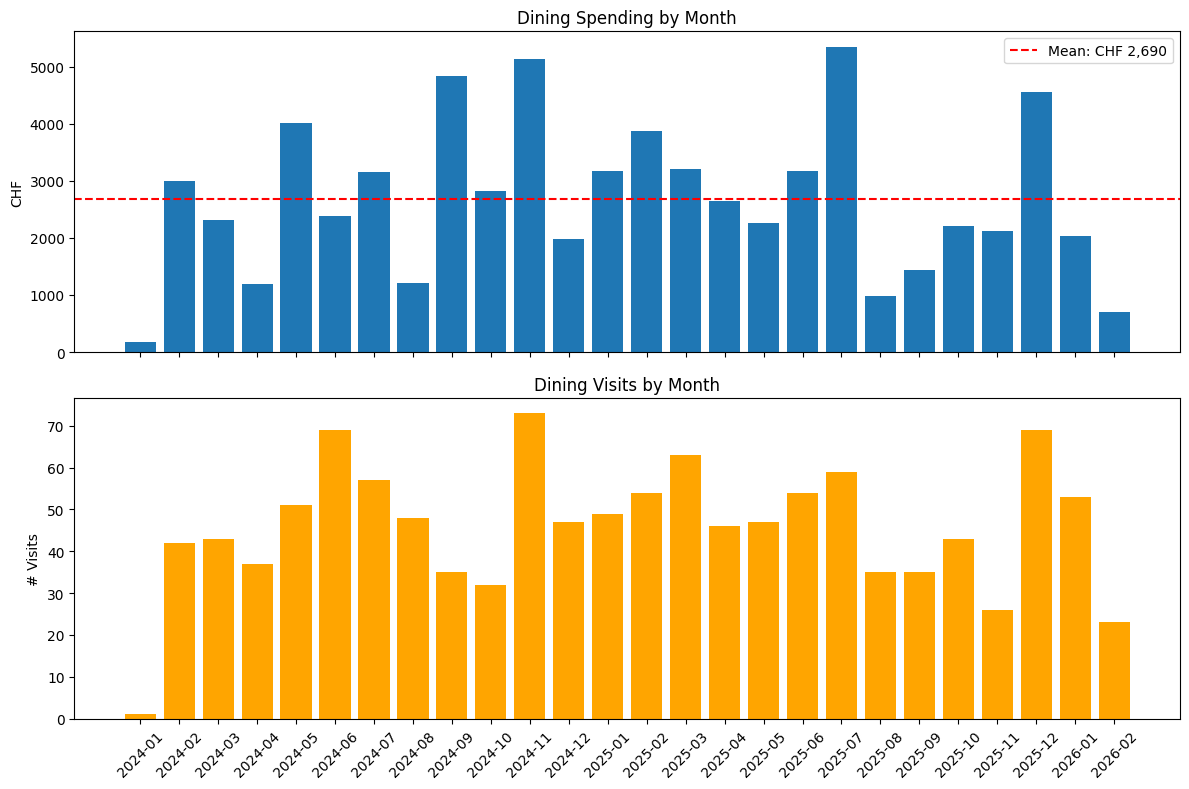

shape: (26, 3)
┌─────────┬───────────┬──────────────┐
│ month   ┆ total_chf ┆ transactions │
│ ---     ┆ ---       ┆ ---          │
│ str     ┆ f64       ┆ u32          │
╞═════════╪═══════════╪══════════════╡
│ 2024-01 ┆ 180.0     ┆ 1            │
│ 2024-02 ┆ 2999.53   ┆ 42           │
│ 2024-03 ┆ 2316.02   ┆ 43           │
│ 2024-04 ┆ 1200.26   ┆ 37           │
│ 2024-05 ┆ 4017.64   ┆ 51           │
│ …       ┆ …         ┆ …            │
│ 2025-10 ┆ 2206.29   ┆ 43           │
│ 2025-11 ┆ 2114.78   ┆ 26           │
│ 2025-12 ┆ 4548.53   ┆ 69           │
│ 2026-01 ┆ 2033.49   ┆ 53           │
│ 2026-02 ┆ 693.54    ┆ 23           │
└─────────┴───────────┴──────────────┘

Monthly average: CHF 2,690.05
Avg per visit: CHF 58.72


In [23]:
dining = (
    spending
    .filter(pl.col("category") == "Dining")
)

# Monthly trend
dining_monthly = (
    dining
    .group_by("month")
    .agg([
        pl.col("amount").sum().alias("total_chf"),
        pl.col("amount").count().alias("transactions"),
    ])
    .sort("month")
)

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
dm_pd = dining_monthly.to_pandas().set_index("month")

axes[0].bar(dm_pd.index, dm_pd["total_chf"])
mean_monthly = dm_pd["total_chf"].mean()
axes[0].axhline(y=mean_monthly, color="red", linestyle="--", label=f"Mean: CHF {mean_monthly:,.0f}")
axes[0].set_ylabel("CHF")
axes[0].set_title("Dining Spending by Month")
axes[0].legend()

axes[1].bar(dm_pd.index, dm_pd["transactions"], color="orange")
axes[1].set_ylabel("# Visits")
axes[1].set_title("Dining Visits by Month")
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

print(dining_monthly)
print(f"\nMonthly average: CHF {mean_monthly:,.2f}")
print(f"Avg per visit: CHF {dining['amount'].mean():,.2f}")

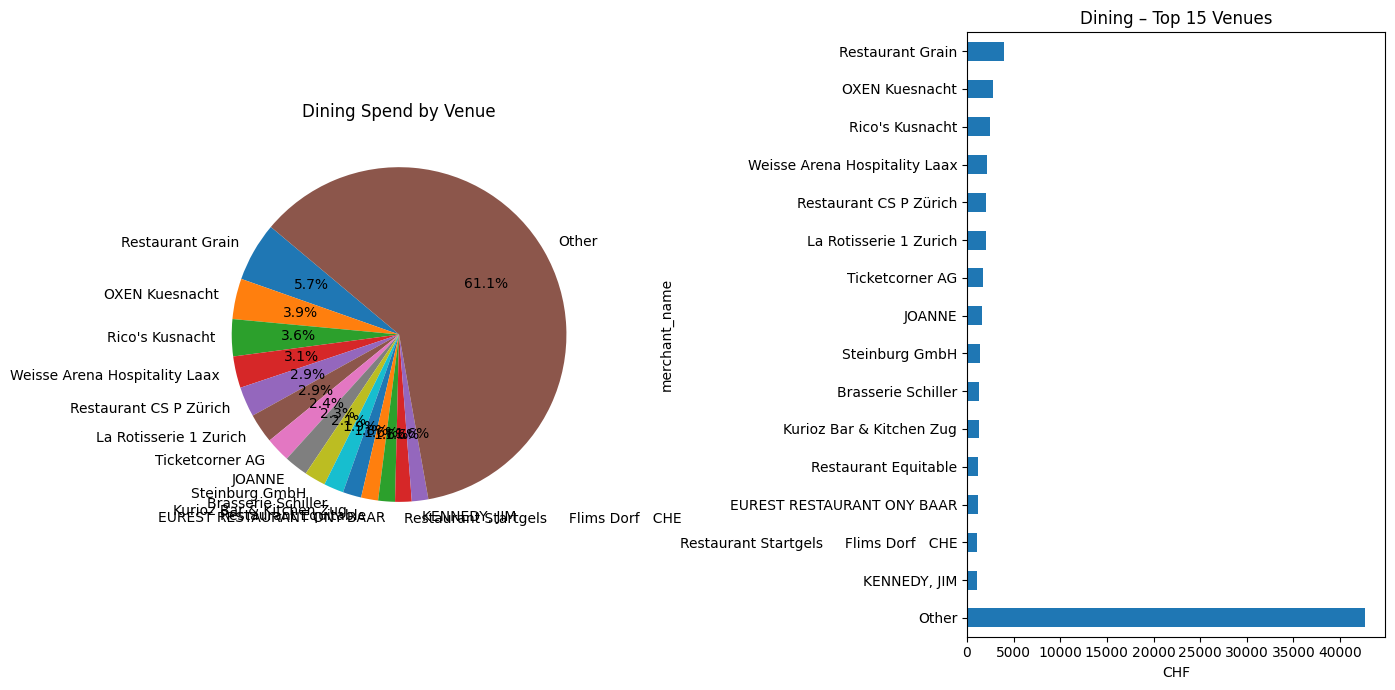

Most visited:
shape: (10, 4)
┌─────────────────────────────────┬───────────┬────────┬───────────────┐
│ merchant_name                   ┆ total_chf ┆ visits ┆ avg_per_visit │
│ ---                             ┆ ---       ┆ ---    ┆ ---           │
│ str                             ┆ f64       ┆ u32    ┆ f64           │
╞═════════════════════════════════╪═══════════╪════════╪═══════════════╡
│ Restaurant CS P Zürich          ┆ 2029.1    ┆ 145    ┆ 13.993793     │
│ EUREST RESTAURANT ONY BAAR      ┆ 1131.3    ┆ 76     ┆ 14.885526     │
│ Weisse Arena Hospitality Laax   ┆ 2133.54   ┆ 59     ┆ 36.161695     │
│ Mitarbeiterrest Zürich          ┆ 780.3     ┆ 54     ┆ 14.45         │
│ www.felfel.ch                   ┆ 422.05    ┆ 49     ┆ 8.613265      │
│ UBS Restaurant Opfikon          ┆ 239.6     ┆ 27     ┆ 8.874074      │
│ THE THAI. TAKE AWAY & ADLIKON … ┆ 550.5     ┆ 25     ┆ 22.02         │
│ Pho Vietnam                     ┆ 467.8     ┆ 22     ┆ 21.263636     │
│ 1982-Foodtruck GmbH 

In [24]:
# Where do we eat & drink?
dining_merchants = (
    dining
    .group_by("merchant_name")
    .agg([
        pl.col("amount").sum().alias("total_chf"),
        pl.col("amount").count().alias("visits"),
        pl.col("amount").mean().alias("avg_per_visit"),
    ])
    .sort("total_chf", descending=True)
)

top_n = 15
top_dining = dining_merchants.head(top_n)
other_total = dining_merchants.slice(top_n)["total_chf"].sum()

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart
pie_labels = top_dining["merchant_name"].to_list() + (["Other"] if other_total > 0 else [])
pie_values = top_dining["total_chf"].to_list() + ([other_total] if other_total > 0 else [])
axes[0].pie(pie_values, labels=pie_labels, autopct="%1.1f%%", startangle=140)
axes[0].set_title("Dining Spend by Venue")

# Bar chart
import pandas as pd
bar_data = top_dining.select(["merchant_name", "total_chf"]).to_pandas()
if other_total > 0:
    bar_data = pd.concat([bar_data, pd.DataFrame({"merchant_name": ["Other"], "total_chf": [other_total]})], ignore_index=True)
bar_data = bar_data.set_index("merchant_name")
bar_data["total_chf"].plot.barh(ax=axes[1])
axes[1].set_xlabel("CHF")
axes[1].set_title(f"Dining – Top {top_n} Venues")
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

# Most frequented spots
print("Most visited:")
print(dining_merchants.sort("visits", descending=True).head(10))
print(f"\nHighest avg spend per visit:")
print(dining_merchants.filter(pl.col("visits") >= 3).sort("avg_per_visit", descending=True).head(10))